In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [5]:
#creating an ordered categorical data type from the VClass variable
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [6]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [7]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [26]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0],200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

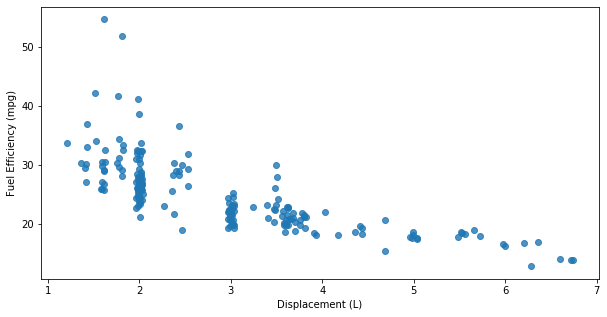

In [27]:
plt.figure(figsize = (10,5))
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
            x_jitter= 0.04,fit_reg = False)
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)');

Adding in shape in the marker parameter to represent Trans type

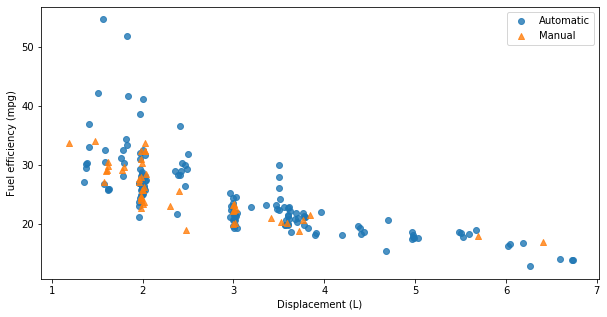

In [29]:
ttype_markers = [['Automatic', 'o'],
                ['Manual','^']]

plt.figure(figsize = (10,5))

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb',
            x_jitter= 0.04,fit_reg = False, marker = marker)
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel efficiency (mpg)')
plt.legend(['Automatic', 'Manual']);

Size below represents CO2 emissions

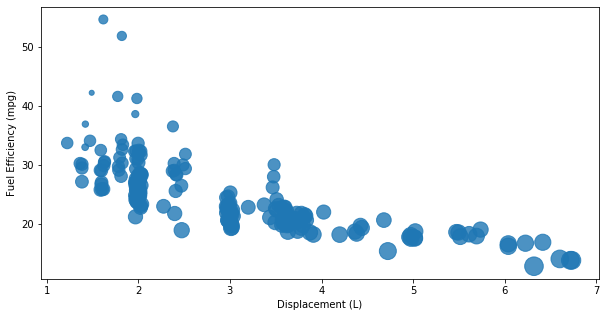

In [34]:
plt.figure(figsize = (10,5))

sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
            x_jitter= 0.04,fit_reg = False, 
            scatter_kws = {'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)');

Now we'll use a loop to create labels for the legend

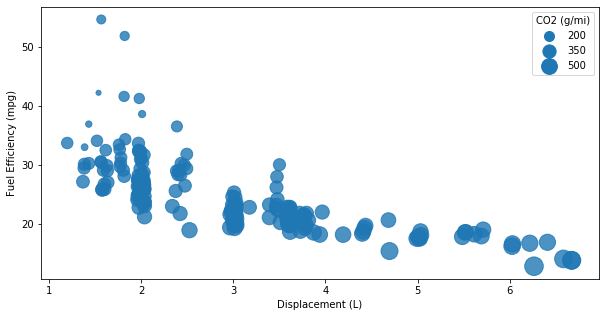

In [35]:
plt.figure(figsize = (10,5))

sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
            x_jitter= 0.04,fit_reg = False, 
            scatter_kws = {'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (L)')
plt.ylabel('Fuel Efficiency (mpg)')

base_color = sns.color_palette()[0]
sizes = [200,350,500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s/2,color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');